<p><font size=6 color="#2E1698"><em><u><center>Data Processing</center></u></em></font></p><br>
<p><font size=3.2 color="#2E1698"><i><u>Introduction:</u></i> explain our data blablabla we are here aiming to manipulate the data that we generated before.</font><p><br>

<font color="#206B50" size = 3><center>**SUMMARY**</center></font><br>
<font size=3.2 color="#2E1698">
<ol>
      <li>Data cleaning</li>
      <li>Provide a list of the 15 most common words</li>
      <li>Provide a list of the 2 pairs of words having the highest co-occurrence frequency</li>
      <li>Build a graphical representation of the most frequent words with their polarity (pos/neg or anger/joy/fear/...)</li>
      <li>Indicate the 3 most frequent representatives words in each category</li>
      <li>Compare the results of the two approaches</li>
    </ol>
</font>

<p><font size=3 color="#206B50"><center><B>PART I: DATA CLEANING</B></center></font></p>
<font size=3 color="#2E1698">First things first, let's import the csv file. We are using french tweets this is why we need to specify the UTF-8 encoding. To have a better idea of our database we decided to show the first 5 lines.</font><br>

In [1]:
tweets = read.csv("data/debat_primaire_20000.csv", encoding="UTF-8")
print(dim(tweets))
head(tweets, n = 5)

[1] 20000    17


X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
1,Ce fut un débat intéressnt ! Ccl :Il y'a encore de l'espoir!N'oublions pas qu'un bon président est un président engagé ! #PrimaireLeDebat,FALSE,0,NA,2017-01-19 22:50:06,FALSE,NA,8.222146e+17,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",OuAtas,0,FALSE,FALSE,NA,NA
2,C'est bon @GoogleFR @TwitterFrance avez vous bien collectés mes données ? Bonne nuit #numerique #bigdata #PrimaireLeDébat,FALSE,0,NA,2017-01-19 22:50:06,FALSE,NA,8.222146e+17,NA,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",WajdiHA2,0,FALSE,FALSE,NA,NA
3,"RT @DeLuca_Patrice: .@manuelvalls ""Je veux incarner l'espérance, venez voter dimanche!"" #AvecValls #PrimaireLeDebat",FALSE,0,NA,2017-01-19 22:50:06,FALSE,NA,8.222146e+17,NA,"<a href=""http://www.twitter.com"" rel=""nofollow"">Twitter for Windows</a>",ProvenceValls,5,TRUE,FALSE,NA,NA
4,"RT @DeLuca_Patrice: .@manuelvalls ""Nous avons besoin d'une Europe forte et unie"" #AvecValls #PrimaireLeDebat #Valls2017",FALSE,0,NA,2017-01-19 22:50:05,FALSE,NA,8.222146e+17,NA,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Jojo29_BZH,10,TRUE,FALSE,NA,NA
5,RT @LPF_Paris18: #PrimaireLeDebat Dis donc @manuelvalls c'est à coup de #decheancedenationalite et de #49Al3 que tu penses nous sauver? #Mo…,FALSE,0,NA,2017-01-19 22:50:05,FALSE,NA,8.222146e+17,NA,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",FranceCredible,6,TRUE,FALSE,NA,NA


<p><font color="#2E1698" size = 3.2>As you can see, our data frame contains <font color="red">17</font> columns and <font color="red">20 000</font> rows, let's see the 10 firsts rows.</font><br></p>
<font color="#2E1698" size = 3.2>Let's see if all the columns have multiple values, or if some are useless.</font>

In [2]:
cat("UNIQUE", "\n")
cat("Favorited: ",head(unique(tweets$favorited)), "\n")
cat("FavoriteCount: ",head(unique(tweets$favoriteCount)), "\n")
cat("ReplyToSN: ",head(unique(tweets$replyToSN)), "\n")
cat("ReplyToUID: ",head(unique(tweets$replyToUID)), "\n")
cat("Id: ",head(unique(tweets$id)), "\n")
cat("IsRetweet: ",head(unique(tweets$isRetweet)), "\n")
cat("Lattitude: ",head(unique(tweets$latitude)), "\n")
cat("Longitude: ",head(unique(tweets$longitude)), "\n\n")

UNIQUE 
Favorited:  FALSE 
FavoriteCount:  0 1 3 2 20 17 
ReplyToSN:  NA 216 36 8 159 32 
ReplyToUID:  NA 8.144061e+17 500852226 87425370 465866698 14389177 
Id:  8.222146e+17 8.222146e+17 8.222146e+17 8.222146e+17 8.222146e+17 8.222146e+17 
IsRetweet:  FALSE TRUE 
Lattitude:  NA 46.813 48.88828 48.88826 48.88828 48.89228 
Longitude:  NA 8.4445 2.395666 2.395496 2.39554 2.331879 



In [3]:
cat("Favorited TRUE: ", length(which(tweets$favorited == "TRUE")), "\n")
cat("Favorited FALSE: ", length(which(tweets$favorited == "FALSE")), "\n\n")

Favorited TRUE:  0 
Favorited FALSE:  20000 



<font  
color="#2E1698" size = 3.2>We can see here that there is no TRUE value for favorited, only FALSE. favorited is useless though.</font>

In [4]:
cat("No favoritedCount: ", length(which(tweets$favoriteCount == 0)), "\n")
cat("At least one favoritedCount: ", length(which(tweets$favoriteCount != 0)), "\n")
cat("Percentage of tweets that have favoritedCount",(3919/20000)*100,"%")

No favoritedCount:  16081 
At least one favoritedCount:  3919 
Percentage of tweets that have favoritedCount 19.595 %

<font color="#2E1698" size = 3.2>The favoriteCount have multiple values, 20% of the are not 0 we better keep this column. It is maybe a significative data</font>

In [5]:
cat("Tweets containing longitude information: ", length(which(tweets$longitude != "NA")), "\n")
cat("Tweets containing latitude information: ", length(which(tweets$latitude != "NA")), "\n")
cat("Percentage of tweets containing infos: ", 9/20000*100, "%")

Tweets containing longitude information:  9 
Tweets containing latitude information:  9 
Percentage of tweets containing infos:  0.045 %

<font color="#2E1698" size = 3.2>There is only 9 tweets over 20 000 that contains latitude and longitude, this represents only 0.045% of the tweets, this info can be considered as useless, and we can delete this two columns too.</font>


In [6]:
cat("Tweets with replyToSN not null", length(which(tweets$replyToSN != "NA")),"\n")
cat("Tweets with replyToUID not null", length(which(tweets$replyToUID != 'NA')), "\n")
cat ("Tweets with replyToSID not null", length(which(tweets$replyToSID != 'NA')), "\n")
cat("Percentage of tweets containing replyToSN/UID", 698/20000*100, "%", "\n")
cat("Percentage of tweets containing replyToSID", 445/20000*100, "%")

Tweets with replyToSN not null 698 
Tweets with replyToUID not null 698 
Tweets with replyToSID not null 445 
Percentage of tweets containing replyToSN/UID 3.49 % 
Percentage of tweets containing replyToSID 2.225 %

<font color="#2E1698" size = 3.2>There is only about 3.5% of the replytoSN and replyToUID data that are not NA, we can delete these two columns as they don't seem to be interesting to study. Same thing for the replyToSID, with less than 2.5%. <br><br>
Let's delete these useless columns!</font>

In [7]:
tweets <- subset(tweets, select=-c(replyToSN,replyToUID, replyToSID, latitude, longitude, favorited))

In [8]:
head(tweets, n=10)

X,text,favoriteCount,created,truncated,id,statusSource,screenName,retweetCount,isRetweet,retweeted
1,Ce fut un débat intéressnt ! Ccl :Il y'a encore de l'espoir!N'oublions pas qu'un bon président est un président engagé ! #PrimaireLeDebat,0,2017-01-19 22:50:06,FALSE,8.222146e+17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",OuAtas,0,FALSE,FALSE
2,C'est bon @GoogleFR @TwitterFrance avez vous bien collectés mes données ? Bonne nuit #numerique #bigdata #PrimaireLeDébat,0,2017-01-19 22:50:06,FALSE,8.222146e+17,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",WajdiHA2,0,FALSE,FALSE
3,"RT @DeLuca_Patrice: .@manuelvalls ""Je veux incarner l'espérance, venez voter dimanche!"" #AvecValls #PrimaireLeDebat",0,2017-01-19 22:50:06,FALSE,8.222146e+17,"<a href=""http://www.twitter.com"" rel=""nofollow"">Twitter for Windows</a>",ProvenceValls,5,TRUE,FALSE
4,"RT @DeLuca_Patrice: .@manuelvalls ""Nous avons besoin d'une Europe forte et unie"" #AvecValls #PrimaireLeDebat #Valls2017",0,2017-01-19 22:50:05,FALSE,8.222146e+17,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Jojo29_BZH,10,TRUE,FALSE
5,RT @LPF_Paris18: #PrimaireLeDebat Dis donc @manuelvalls c'est à coup de #decheancedenationalite et de #49Al3 que tu penses nous sauver? #Mo…,0,2017-01-19 22:50:05,FALSE,8.222146e+17,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",FranceCredible,6,TRUE,FALSE
6,"""J'ai un progrès précis, crédible, de gauche"", a dit @Vincent_Peillon dans sa conclusion https://t.co/Zs9UHNLcNb… https://t.co/mBtiNvJIAb",0,2017-01-19 22:50:05,TRUE,8.222146e+17,"<a href=""http://snappytv.com"" rel=""nofollow"">SnappyTV.com</a>",Europe1,0,FALSE,FALSE
7,RT @benoithamon: #PrimaireLeDebat Paix au Proche-orient : nous devons écouter les sociétés et prendre des initiatives -&gt; reconnaissance de…,0,2017-01-19 22:50:05,FALSE,8.222146e+17,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Mobile Web (M5)</a>",delpeyrat,225,TRUE,FALSE
8,RT @SylviaPinel: Les contours de son programme restent flous d'ailleurs #PrimaireLeDebat,0,2017-01-19 22:50:05,FALSE,8.222146e+17,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",NouetDom,5,TRUE,FALSE
9,"RT @AnneYunie59000: #PrimaireLeDebat Après les 7 plaies d'Egypte ,les Français ont le droit ce soir aux 7 plaies de la France .",0,2017-01-19 22:50:05,FALSE,8.222146e+17,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Mobile Web (M5)</a>",delhoume7,20,TRUE,FALSE
10,Voilà pourquoi voter pour #Montebourg dimanche ! #Montebourg2017 #PrimaireLeDebat https://t.co/2dk2xOSLvA,0,2017-01-19 22:50:05,FALSE,8.222146e+17,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",antoinehb,0,FALSE,FALSE


<font color="#2E1698" size = 3.2>If we want to use the text, it have to be cleaned first</font>


In [9]:
clean_text = function(x)
{
    #To convert the text in lowercase
    try.error = function(z)
    {
        y = NA
        try_error = tryCatch(tolower(z), error=function(e) e)
            if (!inherits(try_error, "error"))
                y = tolower(z)
                return(y)
    }
            
    x = sapply(x, try.error)
    
    #Keep lepen > 3 letters
    x = gsub("le pen", "lepen", x)
    x = gsub("#primaire\\w+ *", "", x)
            
     #remove all links starting by http
    x = gsub('http\\S+\\s*', '', x)
            
    # replace apostrophes
    x = gsub("'", " ", x)

    # remove punctuation except @, #, _, -
    x = gsub("@", "AAAAAAAAAAA", x)
    x = gsub("#", "BBBBBBBBBBB", x)
    x = gsub("_", "CCCCCCCCCCC", x)
    x = gsub("-", "DDDDDDDDDDD", x)
    x = gsub("[[:punct:]]", " ", x)
    x = gsub("AAAAAAAAAAA", "@", x)
    x = gsub("BBBBBBBBBBB", "#", x)
    x = gsub("CCCCCCCCCCC", "_", x)
    x = gsub("DDDDDDDDDDD", "-", x)
            
    # correcting the spaces after the conserved @
    x = gsub("@ ", "@", x)
            
    # correcting the spaces after the conserved _
    x = gsub("_ ", "_", x)
            
    # correcting the spaces after the conserved -
    x = gsub("- ", "-", x)
    
    # remove numbers/Digits
    x = gsub("[[:digit:]]", "", x)
    
    # remove tabs
    x = gsub("[ |\t]{2,}", " ", x)
            
    # remove blank spaces at the beginning/end
    x = gsub("^ ", "", x)  
    x = gsub(" $", "", x)
    
    
    # As we have already a column indicating if the tweet is a retweet or not 
    # we can remove "RT @xxx" in the tweet header
    x = gsub("rt @\\w+ *", "", x)
    x = gsub('\\b\\w{1,3}\\s','', x)
    x = gsub('bachar', '', x)
    x = gsub('assad', 'alassad', x)
            
    # remove double spaces
    x = gsub("  ", " ", x)
    x = gsub("  ", " ", x)
    return(x)
}
                             
tweets$text <- clean_text(tweets$text)
head(tweets, n = 20)

X,text,favoriteCount,created,truncated,id,statusSource,screenName,retweetCount,isRetweet,retweeted
1,débat intéressnt encore espoir oublions président président engagé,0,2017-01-19 22:50:06,FALSE,8.222146e+17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",OuAtas,0,FALSE,FALSE
2,@googlefr @twitterfrance avez vous bien collectés données bonne nuit #numerique #bigdata,0,2017-01-19 22:50:06,FALSE,8.222146e+17,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",WajdiHA2,0,FALSE,FALSE
3,@manuelvalls veux incarner espérance venez voter dimanche #avecvalls,0,2017-01-19 22:50:06,FALSE,8.222146e+17,"<a href=""http://www.twitter.com"" rel=""nofollow"">Twitter for Windows</a>",ProvenceValls,5,TRUE,FALSE
4,@manuelvalls nous avons besoin europe forte unie #avecvalls #valls,0,2017-01-19 22:50:05,FALSE,8.222146e+17,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Jojo29_BZH,10,TRUE,FALSE
5,donc @manuelvalls coup #decheancedenationalite #penses nous sauver #mo,0,2017-01-19 22:50:05,FALSE,8.222146e+17,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",FranceCredible,6,TRUE,FALSE
6,progrès précis crédible gauche @vincent_peillon dans conclusion,0,2017-01-19 22:50:05,TRUE,8.222146e+17,"<a href=""http://snappytv.com"" rel=""nofollow"">SnappyTV.com</a>",Europe1,0,FALSE,FALSE
7,paix proche-orient nous devons écouter sociétés prendre initiatives -reconnaissance de,0,2017-01-19 22:50:05,FALSE,8.222146e+17,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Mobile Web (M5)</a>",delpeyrat,225,TRUE,FALSE
8,contours programme restent flous ailleurs,0,2017-01-19 22:50:05,FALSE,8.222146e+17,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",NouetDom,5,TRUE,FALSE
9,après plaies egypte français droit soir plaies france,0,2017-01-19 22:50:05,FALSE,8.222146e+17,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Mobile Web (M5)</a>",delhoume7,20,TRUE,FALSE
10,voilà pourquoi voter pour #montebourg dimanche #montebourg,0,2017-01-19 22:50:05,FALSE,8.222146e+17,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",antoinehb,0,FALSE,FALSE


<font color="#2E1698" size = 3.2>Let's see which are the most used @xxx and replace them with words. Afterward we will delete all the @xxx that will not be replaced</font>


In [10]:
col = tweets$text
at.pattern = "@\\w+ *"
have.at = grep(x = col, pattern = at.pattern)
at.matches = gregexpr(pattern = at.pattern,
                        text = col[have.at])
extracted.at = regmatches(x = col[have.at], m = at.matches)

# most frequent words
mfw = sort(unlist(extracted.at), decreasing=TRUE)
mfw = gsub(" ", "", mfw)
top40_user_called = sort(table(unlist(mfw)), decreasing=TRUE)
head(top40_user_called, n = 40)


    @benoithamon      @montebourg     @manuelvalls @vincent_peillon 
             985              815              611              511 
        @fderugy  @emmanuelmacron        @francetv     @sylviapinel 
             370              299              296              233 
 @leprojetfrance    @jlbennahmias    @jeunesavecam       @leasalame 
             151              129               68               66 
      @yanngalut @realdonaldtrump         @najatvb          @europe 
              64               61               48               40 
 @francecredible       @fhollande    @davidpujadas             @vp_ 
              40               38               35               30 
       @montebou       @chtaubira    @mathieusapin     @guillaumetc 
              29               28               28               24 
   @martineaubry         @compile     @jlmelenchon      @franceinfo 
              21               18               18               17 
          @bfmtv    @fabiennamias

In [11]:
clean_name_text = function(x)
{
  x = gsub('\\S+hamo\\S+', 'hamon', x)
  x = gsub('\\S+ontebou\\S+', 'montebourg', x)
  x = gsub('\\S+vall\\S+', 'valls', x)
  x = gsub('\\S+peillon\\S+', 'peillon', x)
  x = gsub('\\S+rugy\\S+', 'derugy', x)
  x = gsub('\\S+macro\\S+', 'macron', x)
  x = gsub('\\S+francet\\S+', 'francetv', x)
  x = gsub('\\S+pinel\\S+', 'pinel', x)
  x = gsub('\\S+nnahmia\\S+', 'bennahmias', x)
  x = gsub('\\S+eunesavecam\\S+', 'montebourg', x) #jeunes avec Arnaud Montebourg
  x = gsub('\\S+galut\\S+', 'galut', x) 
  x = gsub('\\S+donald\\S+', 'trump', x)
  x = gsub('\\S+trump\\S+', 'trump', x)
  x = gsub('\\S+najat\\S+', 'najatvb', x)
  x = gsub('\\S+vallaud\\S+', 'najatvb', x)
  x = gsub('\\S+elkacem\\S+', 'najatvb', x)
  x = gsub('\\S+europe\\S+', 'europe', x)
  x = gsub('\\S+olland\\S+', 'hollande', x)
  x = gsub('\\S+ujada\\S+', 'pujadas', x)
  x = gsub('\\S+ujada\\S+', 'pujadas', x)
  x = gsub('\\S+taubir\\S+', 'taubira', x)
  x = gsub('\\S+sapin\\S+', 'sapin', x)
  x = gsub('\\S+guillaumetc\\S+', 'taubira', x)
  x = gsub('\\S+aubry\\S+', 'aubry', x)
  x = gsub('\\S+compile\\S+', 'compile', x)
  x = gsub('\\S+melenchon\\S+', 'melenchon', x)
  x = gsub('\\S+francei\\S+', 'franceinfo', x)
  x = gsub('\\S+bfm\\S+', 'bfmtv', x)
  x = gsub('\\S+namia\\S+', 'namias', x)
  x = gsub('\\S+vp_\\S+', 'peillon', x)
  x = gsub('\\S+fillon\\S+', 'fillon', x)
  x = gsub('\\S+avecmv\\S+', 'valls', x) #Avec Manuel Valls
  x = gsub('\\S+mlp\\S+', 'lepen', x)

  x = gsub("#\\w+ *", "", x)
  x = gsub("@\\w+ *", "", x)
}

tweets$text <- clean_name_text(tweets$text)

<p><font size=3 color="#206B50"><center><B>PART II: LIST OF 15 MOST COMMON WORD</B></center></font></p>
<font color="#2E1698" size = 3.2>Let's see which are the most used words</font>

In [12]:
at.pattern = "[a-zA-Z]\\w+ *"
have.at = grep(x = col, pattern = at.pattern)
at.matches = gregexpr(pattern = at.pattern,
                        text = col[have.at])
extracted.at = regmatches(x = col[have.at], m = at.matches)

# most frequent words
mfw = sort(unlist(extracted.at), decreasing=TRUE)
mfw = gsub(" ", "", mfw)
w = sort(table(unlist(mfw)), decreasing=TRUE)

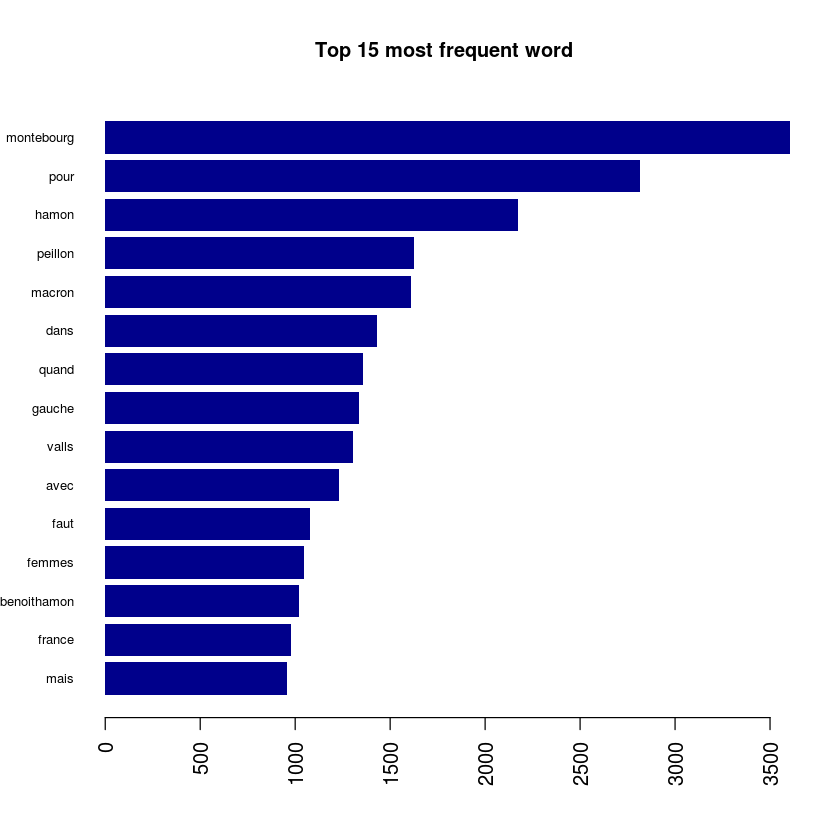

In [13]:
number_Top = function(number){
  topWord = head(w, n = number)
  topWord = sort(topWord, decreasing=FALSE) 
  return(topWord)
}

top15 = number_Top(15)
barplot(top15, border=NA, las=2, main="Top 15 most frequent word", cex.main=1, horiz=TRUE, col= "darkblue", cex.names=0.65)

<font color="#2E1698" size = 3.2>We can see in the display of the 15 most frequent word that some of them are not revelant like the preposition 'dans' so we want to clean our text again</font>

In [14]:
clean_unused_text = function(x){
    
    x = gsub("dans ", "", x)
    x = gsub("pour ", "", x)
    x = gsub("quand ", "", x)
    x = gsub("avec ", "", x)
    x = gsub("mais ", "", x)
    x = gsub("tre ", "", x)
    x = gsub("vous ", "", x)
    x = gsub("nous ", "", x)
    x = gsub("comme ", "", x)
    x = gsub("plus ", "", x)
    x = gsub("tout ", "", x)
    x = gsub("sont ", "", x)
}


tweets$text <- clean_unused_text(tweets$text)

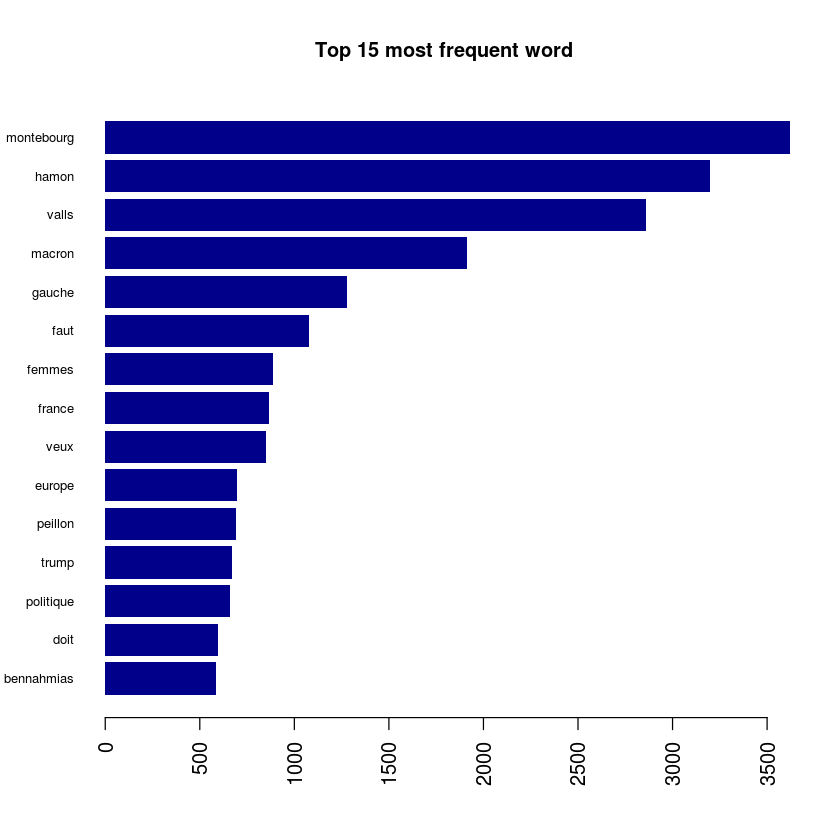

In [15]:
col = tweets$text
at.pattern = "[a-zA-Z]\\w+ *"
have.at = grep(x = col, pattern = at.pattern)
at.matches = gregexpr(pattern = at.pattern, text = col[have.at])
extracted.at = regmatches(x = col[have.at], m = at.matches)

# most frequent words
mfw = sort(unlist(extracted.at), decreasing=TRUE)
mfw = gsub(" ", "", mfw)
w = sort(table(unlist(mfw)), decreasing=TRUE)
#head(d, n = 20)

top15 = number_Top(15)
barplot(top15, border=NA, las=2, main="Top 15 most frequent word", cex.main=1, horiz=TRUE, col= "darkblue", cex.names=0.65)

In [19]:
#install.packages("tm")
library(tm) # need R 3.3.2
docs <- Corpus(VectorSource(tweets$text))
dtm <- TermDocumentMatrix(docs)
findAssocs(dtm, c("montebourg", "hamon", "valls", "macron", "gauche", "faut", "femmes", "france", "veux", 
                  "europe", "peillon", "trump", "politique", "doit", "bennahmias"), corlimit = 0.1)

$montebourg
        loup         flou    suffrages     sondages       arnaud      tribune 
        0.28         0.27         0.21         0.19         0.18         0.16 
    échevelé nationalisme    programme   appartiens       suffit       fortes 
        0.15         0.14         0.14         0.13         0.13         0.12 
        rome    retrouvez sérieusement 
        0.12         0.11         0.11 

$hamon
         palestine            doubler        communistes        écologistes 
              0.22               0.21               0.18               0.18 
       macronistes           souhaite             benoît          classique 
              0.18               0.17               0.16               0.16 
      terriblement            préfère            vieille       colonisation 
              0.16               0.15               0.15               0.14 
         solutions            actions      incantatoires             israël 
              0.14               0.13               0.13               0.13 
         ministère            paroles          processus       reconnaîetat 
              0.13               0.13               0.13               0.13 
 reconnaipalestine          tradition             trouve             benoit 
              0.13               0.13               0.13               0.12 
            droits      inintéressant         libération              lutte 
              0.12               0.12               0.12               0.12 
      palestiniens            sincère        territoires un-candidaat-clive 
              0.12               0.12               0.12               0.12 
         concrètes            honneur               mine           recettes 
              0.11               0.11               0.11               0.11 
            budget             échoué        enpalestine             faites 
              0.10               0.10               0.10               0.10 
              fans              finir       reconnaîétat            sauvage 
              0.10               0.10               0.10               0.10 

$valls
    incarner       manuel       équipe    espérance   interdites         clou 
        0.23         0.16         0.15         0.15         0.14         0.13 
     enfoncé       espace indépendante     confirmé         unie    éducative 
        0.13         0.13         0.13         0.12         0.12         0.11 
       forte         mots       nation        prime     sécurité      sérieux 
        0.11         0.11         0.11         0.11         0.11         0.11 
    surkiffé        train        vanne        achat compatriotes     crédible 
        0.11         0.11         0.11         0.10         0.10         0.10 
     déroule          htt  refondation 
        0.10         0.10         0.10 

$macron
         flou          loup      emmanuel     programme          peur 
         0.40          0.40          0.20          0.20          0.16 
    classique inintéressant        propos  terriblement        trouve 
         0.15          0.15          0.15          0.15          0.15 
  libéralisme       prodige     numérique        patiné     reviendra 
         0.14          0.14          0.13          0.13          0.13 
  start-reste          tele         blair          cite       ironise 
         0.13          0.13          0.12          0.12          0.12 
     charmant      comprend      démarche          fils        phrase 
         0.11          0.11          0.11          0.11          0.11 
     prodigue      schröder         vieux     interrogé        lapsus 
         0.11          0.11          0.11          0.10          0.10 
    libérales          lieu    révélateur    simplement 
         0.10          0.10          0.10          0.10 

$gauche
          crédible            moderne  reconnaipalestine             serait 
              0.25               0.25               0.25               0.25 
         tradition         appar

<p><font size=3 color="#206B50"><center><B>PART III: GRAPHICAL REPRESENTATION</B></center></font></p>
<font color="#2E1698" size = 3.2>The first graphical representation we'll do is a wordcloud representing what we found in the part above (most used words). To do that we will use wordcloud library which is really representative for our work. Let's see what does it look like in our case.</font>

Loading required package: RColorBrewer


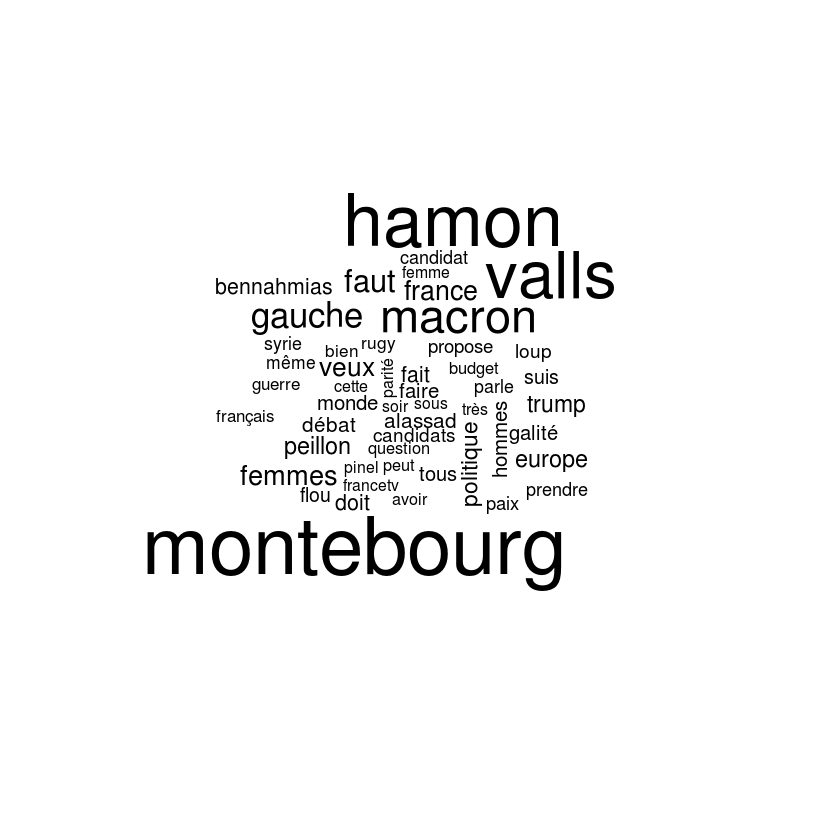

In [17]:
#install.packages("wordcloud")
#install.packages("SnowballC")
library(SnowballC)
library(wordcloud)

top50 = number_Top(50)
wordcloud(names(top50), top50, min.freq=2)

In [18]:
#require(devtools)
#install_github("lchiffon/wordcloud2")
library(wordcloud2)

top100 = number_Top(100)
cat("The letterCloud function does not work on Jupyter notebook, if you are using markdown, you can uncomment this line.")
#letterCloud(top100, word = "PS", wordSize = 1)

ERROR: Error in library(wordcloud2): there is no package called ‘wordcloud2’


<p><font size=3 color="#206B50"><center><B>PART V: Indicate 3 most frequent words in each category</B></center></font></p>
<font color="#2E1698" size = 3.2>The first step is to categorize each tweet then we will see the most common word in each category (positive, neutral, negative). So far we have found and traduce a list of positive and negative words, stored into a .txt file.</font>

In [ ]:
# Reminder for later, keep the "pas", "ne" and all noted negation words as they change the score of a word

In [20]:
sentence <- tweets$text
head(sentence)

[1] "débat intéressnt encore espoir oublions président président engagé"
[2] "avez bien collectés données bonne nuit "                           
[3] "valls veux incarner espérance venez voter dimanche valls"          
[4] "valls avons besoin europe forte unie valls valls"                  
[5] "donc valls coup sauver "                                           
[6] "progrès précis crédible gauche conclusion"

In [21]:
#evaluation tweets function
score.sentiment <- function(sentences, pos.words, neg.words, .progress='none')
{
  require(plyr)
  require(stringr)
  scores <- laply(sentences, function(sentence, pos.words, neg.words){
    word.list <- str_split(sentence, ' ')
    words <- unlist(word.list)
    pos.matches <- match(words, pos.words)
    neg.matches <- match(words, neg.words)
    pos.matches <- !is.na(pos.matches)
    neg.matches <- !is.na(neg.matches)
    score <- sum(pos.matches) - sum(neg.matches)
    return(score)
  }, pos.words, neg.words, .progress=.progress)
 scores.df <- data.frame(score=scores, text=sentences)
 return(scores.df)
}
pos <- scan('data/NegPos/Positive.txt', what='character', comment.char=';') #folder with positive dictionary
neg <- scan('data/NegPos/Negative.txt', what='character', comment.char=';') #folder with negative dictionary
scores <- score.sentiment(sentence, pos, neg, .progress='text')
head(scores)

Loading required package: plyr
Loading required package: stringr


  |======================================================================| 100%


score,text
0,débat intéressnt encore espoir oublions président président engagé
0,avez bien collectés données bonne nuit
0,valls veux incarner espérance venez voter dimanche valls
1,valls avons besoin europe forte unie valls valls
-1,donc valls coup sauver
3,progrès précis crédible gauche conclusion


In [22]:
#total evaluation: positive / negative / neutral
 stat <- scores
 stat$created <- tweets$created
 stat$created <- as.Date(stat$created)
 stat <- mutate(stat, tweet=ifelse(stat$score > 0, 'positive', ifelse(stat$score < 0, 'negative', 'neutral')))
head(stat)

score,text,created,tweet
0,débat intéressnt encore espoir oublions président président engagé,2017-01-19,neutral
0,avez bien collectés données bonne nuit,2017-01-19,neutral
0,valls veux incarner espérance venez voter dimanche valls,2017-01-19,neutral
1,valls avons besoin europe forte unie valls valls,2017-01-19,positive
-1,donc valls coup sauver,2017-01-19,negative
3,progrès précis crédible gauche conclusion,2017-01-19,positive


<font color="#2E1698" size = 3.2>As you can see here there is a problem, some tweets are not scored as they should be. For example the word "incarner" could be in the 'Positive' dictionary but written as "incarne" or "incarné". We should use stemming both on our tweets and on our positive/negative dictionaries.</font>

<font color="#2E1698" size = 3.2>Let's see what we get using stemming this time!</font>

In [23]:
# First we read the negative dictionary and store it into a variable
neg = read.table('data/NegPos/Negative.txt', sep='\n')
# There might be some values present more than once, so let's make it unique
neg = unique(neg)
neg = neg$V1
# To use stemming we have to convert our list of words into a corpus.
negative = VCorpus(VectorSource(neg))

In [24]:
# Same thing here for the positive dictionary
pos = read.table('data/NegPos/Positive.txt', sep='\n')
pos = unique(pos)
pos = pos$V1
positive = VCorpus(VectorSource(pos))

In [25]:
#Stemming of the positive dictionary
pos_stem <- tm_map(positive, PlainTextDocument)  # needs to come before stemming
pos_stem <- tm_map(pos_stem, stemDocument, "french")
#Converting the corpus into a dataframe
dataframe_pos<-data.frame(text=unlist(sapply(pos_stem, `[`, "content")), stringsAsFactors=F)
dataframe_pos<-unique(dataframe_pos)

#Stemming of the negative dictionary                                                       
neg_stem <- tm_map(negative, PlainTextDocument)  # needs to come before stemming
neg_stem <- tm_map(neg_stem, stemDocument, "french")
#Converting the corpus into a dataframe
dataframe_neg<-data.frame(text=unlist(sapply(neg_stem, `[`, "content")), stringsAsFactors=F)
dataframe_neg<-unique(dataframe_neg)

In [26]:
# Let's put the dataframes into a proper format
z_pos = c(dataframe_pos$text)
z_neg = c(dataframe_neg$text)
head(z_pos)
head(z_neg)

# And now we create 2 txt files containing the words negative and positive after stemming

#write.table(z_neg, file = "NegPos/NegativeStem.txt", append = FALSE, quote = FALSE, sep = "\n",
#            na = "NA", dec = ".", row.names = FALSE,
#            col.names = FALSE)
#write.table(z_pos, file = "NegPos/PositiveStem.txt", append = FALSE, quote = FALSE, sep = "\n",
#            na = "NA", dec = ".", row.names = FALSE,
#            col.names = FALSE)

[1] "gagn"      "abond"     "abord"     "accessibl" "acclam"    "accolad"

[1] "vol"      "abandon"  "abasourd" "abattag"  "abatt"    "abattu"

In [27]:
# Stemming of the tweets
txt <- tweets$text
txt = VCorpus(VectorSource(txt))
s <- tm_map(txt, PlainTextDocument)  # needs to come before stemming
s <- tm_map(s, stemDocument, "french")
                                                  
dataframe_stem<-data.frame(text=unlist(sapply(s, `[`, "content")), stringsAsFactors=F)
head(dataframe_stem)

text
débat intéressnt encor espoir oublion président président engag
avez bien collect don bon nuit
vall veux incarn esper ven vot dimanch vall
vall avon besoin europ fort uni vall vall
donc vall coup sauv
progres prec crédibl gauch conclus


In [28]:
#evaluation tweets after stemming function
score.sentiment <- function(sentences, pos.words, neg.words, .progress='none')
{
  require(plyr)
  require(stringr)
  scores <- laply(sentences, function(sentence, pos.words, neg.words){
    word.list <- str_split(sentence, ' ')
    words <- unlist(word.list)
    pos.matches <- match(words, pos.words)
    neg.matches <- match(words, neg.words)
    pos.matches <- !is.na(pos.matches)
    neg.matches <- !is.na(neg.matches)
    score <- sum(pos.matches) - sum(neg.matches)
    return(score)
  }, pos.words, neg.words, .progress=.progress)
 scores.df <- data.frame(score=scores, text=sentences)
 return(scores.df)
}
pos <- scan("data/NegPos/PositiveStem.txt", what='character', comment.char=';') #folder with positive dictionary
neg <- scan("data/NegPos/NegativeStem.txt", what='character', comment.char=';') #folder with negative dictionary
head(neg)
scores <- score.sentiment(dataframe_stem$text, z_pos, z_neg, .progress='text')
head(scores)

[1] "vol"      "abandon"  "abasourd" "abattag"  "abatt"    "abattu"

  |======================================================================| 100%


score,text
1,débat intéressnt encor espoir oublion président président engag
0,avez bien collect don bon nuit
0,vall veux incarn esper ven vot dimanch vall
0,vall avon besoin europ fort uni vall vall
-1,donc vall coup sauv
3,progres prec crédibl gauch conclus


In [29]:
#total evaluation: positive / negative / neutral
 stat <- scores
 stat$original_tweet <- tweets$text
 stat <- mutate(stat, tweet=ifelse(stat$score > 0, 'positive', ifelse(stat$score < 0, 'negative', 'neutral')))

head(stat)

score,text,original_tweet,tweet
1,débat intéressnt encor espoir oublion président président engag,débat intéressnt encore espoir oublions président président engagé,positive
0,avez bien collect don bon nuit,avez bien collectés données bonne nuit,neutral
0,vall veux incarn esper ven vot dimanch vall,valls veux incarner espérance venez voter dimanche valls,neutral
0,vall avon besoin europ fort uni vall vall,valls avons besoin europe forte unie valls valls,neutral
-1,donc vall coup sauv,donc valls coup sauver,negative
3,progres prec crédibl gauch conclus,progrès précis crédible gauche conclusion,positive


<font color="#2E1698" size = 3.2>Now that we have a score on each tweet, let's study the words' occurence.</font>

<font color="#2E1698" size = 3.2>We are going to simply see, like we did before, which word is appearing the most in our positive/negative only dataframe taht we are going to create.</font>

In [30]:
# Building a dataframe with only positive tweets.
positive_tweets = subset(stat, tweet == 'positive')
head(positive_tweets)

,score,text,original_tweet,tweet
1,1,débat intéressnt encor espoir oublion président président engag,débat intéressnt encore espoir oublions président président engagé,positive
6,3,progres prec crédibl gauch conclus,progrès précis crédible gauche conclusion,positive
9,1,apres plai egypt franc droit soir plai franc,après plaies egypte français droit soir plaies france,positive
13,1,veux major franc droit mour dignit permet euthan,veux majorité français droit mourir dignité permettant euthanas,positive
14,2,beaucoup moin attrai primair droit affich équip milieu tableau,beaucoup moins attrayant primaire droite affiche équipes milieu tableau,positive
18,1,retrouv fiert êgauch,retrouvez fierté êgauche,positive


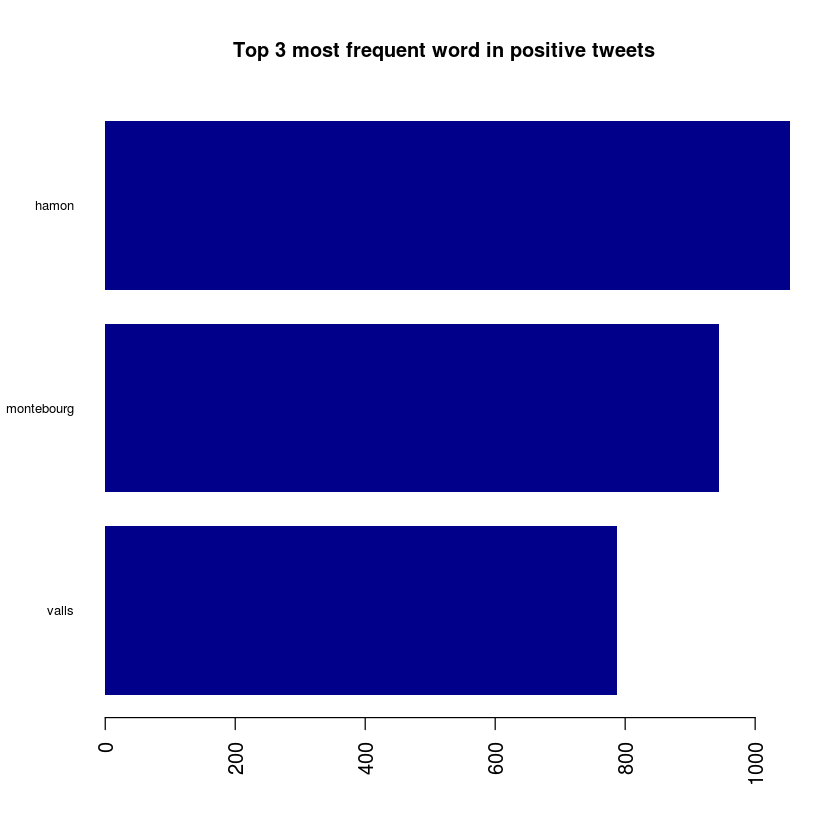

In [31]:
# Let's see which are the word that appear the most:
tweet = positive_tweets$original_tweet
at.pattern = "[a-zA-Z]\\w+ *"
have.at = grep(x = tweet, pattern = at.pattern)
at.matches = gregexpr(pattern = at.pattern,
                        text = tweet[have.at])
extracted.at = regmatches(x = tweet[have.at], m = at.matches)

# most frequent words
mfw = sort(unlist(extracted.at), decreasing=TRUE)
mfw = gsub(" ", "", mfw)
w = sort(table(unlist(mfw)), decreasing=TRUE)

#Using the function number_top already defined before:
top3 = number_Top(3)
barplot(top3, border=NA, las=2, main="Top 3 most frequent word in positive tweets", cex.main=1, horiz=TRUE, col= "darkblue", cex.names=0.65)

In [32]:
# Building a dataframe with only negative tweets.
negative_tweets = subset(stat, tweet == 'negative')
head(negative_tweets)

,score,text,original_tweet,tweet
5,-1,donc vall coup sauv,donc valls coup sauver,negative
8,-1,contour programm restent flous ailleur,contours programme restent flous ailleurs,negative
22,-1,franc doit avoir rôl central défens commun européen fac désengag américain e,france doit avoir rôle central défense commune européenne face désengagement américain e,negative
23,-1,dout soir dimanch vot,doute soir dimanche vote,negative
24,-1,dimanch soi fier êfemm homm gauch ht,dimanche soyez fiers êfemmes hommes gauche ht,negative
30,-1,doubl budget minister droit femm not lutt conviolent harcel,doublement budget ministère droits femmes notamment lutter conviolences harcèl,negative


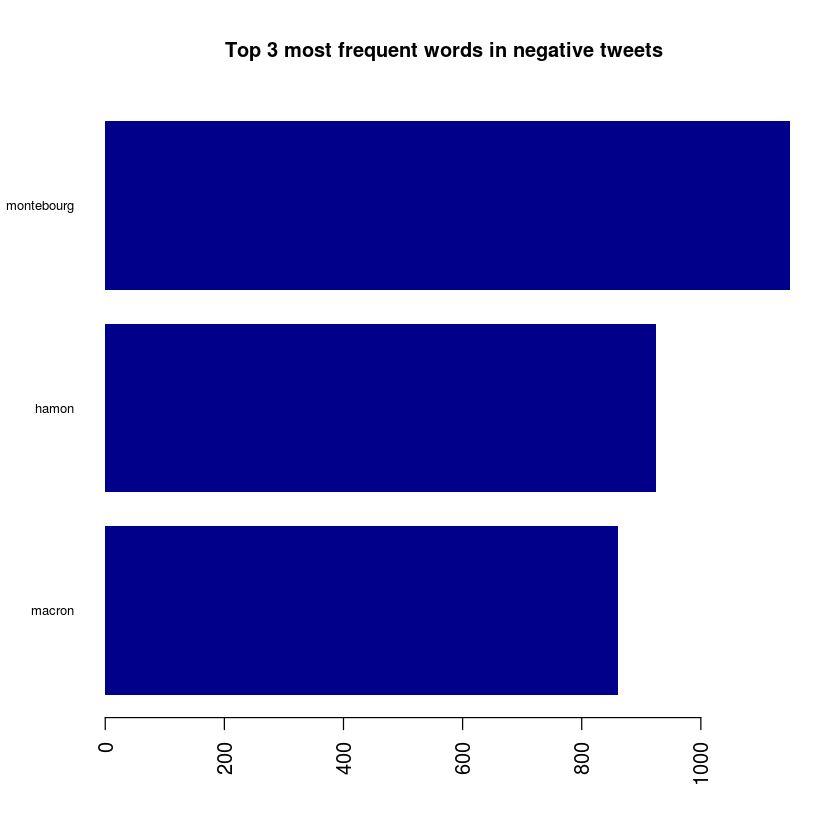

In [33]:
# Let's see which are the word that appear the most (again):
tweet = negative_tweets$original_tweet
at.pattern = "[a-zA-Z]\\w+ *"
have.at = grep(x = tweet, pattern = at.pattern)
at.matches = gregexpr(pattern = at.pattern,
                        text = tweet[have.at])
extracted.at = regmatches(x = tweet[have.at], m = at.matches)

# most frequent words
mfw = sort(unlist(extracted.at), decreasing=TRUE)
mfw = gsub(" ", "", mfw)
w = sort(table(unlist(mfw)), decreasing=TRUE)

#Using the function number_top already defined before:
top3 = number_Top(3)
barplot(top3, border=NA, las=2, main="Top 3 most frequent words in negative tweets", cex.main=1, horiz=TRUE, col= "darkblue", cex.names=0.65)

<font color="#2E1698" size = 3.2>Well, we can see after this little study that there is not much differences between 'positive' and 'negative' tweets. The most occuring words are neither positive or negative and are the same as in the top 15 we did before.</font>

<font color="#2E1698" size = 3.2>Now let's see what we get using another strategy:
    <ol>
      <li>Building a column containing only positive/negative words of a tweet</li>
      <li>Analyse this column only and see which words are appearing the most</li>
    </ol>
</font>

In [34]:
#Building positive.words column:
pos <- scan("data/NegPos/PositiveStem.txt", what='character', comment.char=';')
word.list <- str_split(positive_tweets$text, " ")
positive_tweets$positive.words <- word.list

# this function will create a list of words by comparing if the words in tweet are in the dictionary
positive_words = function(sentence){
    b = c()
    i = 0
    for(w in sentence){
        if(w %in% pos){
            i = i + 1
            b[i] <- w
        }
    }
    return(b)
}
positive_tweets$positive.words <- lapply(positive_tweets$positive.words, positive_words)
head(positive_tweets)

,score,text,original_tweet,tweet,positive.words
1,1,débat intéressnt encor espoir oublion président président engag,débat intéressnt encore espoir oublions président président engagé,positive,engag
6,3,progres prec crédibl gauch conclus,progrès précis crédible gauche conclusion,positive,"progres, prec , crédibl"
9,1,apres plai egypt franc droit soir plai franc,après plaies egypte français droit soir plaies france,positive,droit
13,1,veux major franc droit mour dignit permet euthan,veux majorité français droit mourir dignité permettant euthanas,positive,"droit , dignit"
14,2,beaucoup moin attrai primair droit affich équip milieu tableau,beaucoup moins attrayant primaire droite affiche équipes milieu tableau,positive,"moin , attrai, droit"
18,1,retrouv fiert êgauch,retrouvez fierté êgauche,positive,fiert


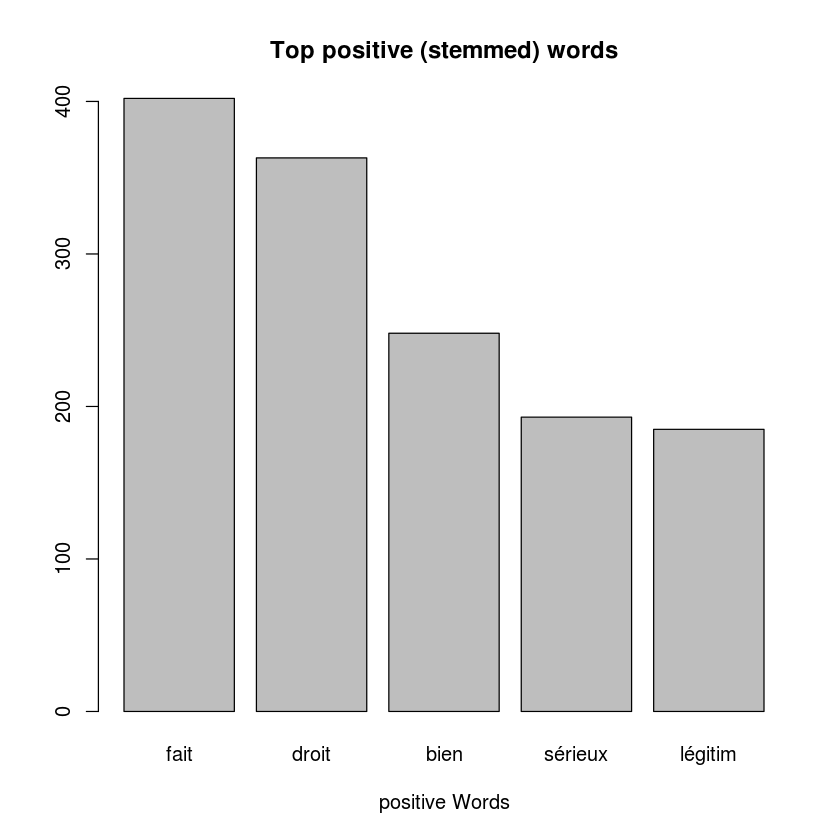

In [35]:
#Plotting our result
words.vector<-unlist(positive_tweets$positive.words)
freq.list<-table(words.vector)
sorted.freq.list<-sort(freq.list, decreasing=TRUE)
mfw = head(sorted.freq.list, n = 5)

# Simple Bar Plot 
barplot(mfw, main="Top positive (stemmed) words", 
  	xlab="positive Words")

<font color="#2E1698" size = 3.2>So, we can see here stemmed words with the highest appearence frequency in positive tweets. We have:
    <ol>
      <li>'fait', the word with the highest frequency.</li>
      <li>'droit', with stemming it regroups also words of the same root, like: 
        <ol>
          <li>droits</li>
          <li>droite</li>
          <li>droites</li>
        </ol>
      </li>
      <li>'bien'</li>
      <li>'sérieux'</li>
      <li>'légitim', which is not even a real word but with stemming it regroup words of the same root like:
        <ol>
          <li>légitime</li>
          <li>légitimes</li>
        </ol>
      </li>
    </ol>
</font>

In [36]:
#Building negative.words column:
neg <- scan("data/NegPos/NegativeStem.txt", what='character', comment.char=';')
word.list <- str_split(negative_tweets$text, " ")
negative_tweets$negative.words <- word.list

# this function will create a list of words by comparing if the words in tweet are in the dictionary
negative_words = function(sentence){
    b = c()
    i = 0
    for(w in sentence){
        if(w %in% neg){
            i = i + 1
            b[i] <- w
        }
    
    }
    return(b)
}
negative_tweets$negative.words <- lapply(negative_tweets$negative.words, negative_words)
head(negative_tweets)

,score,text,original_tweet,tweet,negative.words
5,-1,donc vall coup sauv,donc valls coup sauver,negative,coup
8,-1,contour programm restent flous ailleur,contours programme restent flous ailleurs,negative,flous
22,-1,franc doit avoir rôl central défens commun européen fac désengag américain e,france doit avoir rôle central défense commune européenne face désengagement américain e,negative,"défens, fac"
23,-1,dout soir dimanch vot,doute soir dimanche vote,negative,dout
24,-1,dimanch soi fier êfemm homm gauch ht,dimanche soyez fiers êfemmes hommes gauche ht,negative,fier
30,-1,doubl budget minister droit femm not lutt conviolent harcel,doublement budget ministère droits femmes notamment lutter conviolences harcèl,negative,"femm , lutt , harcel"


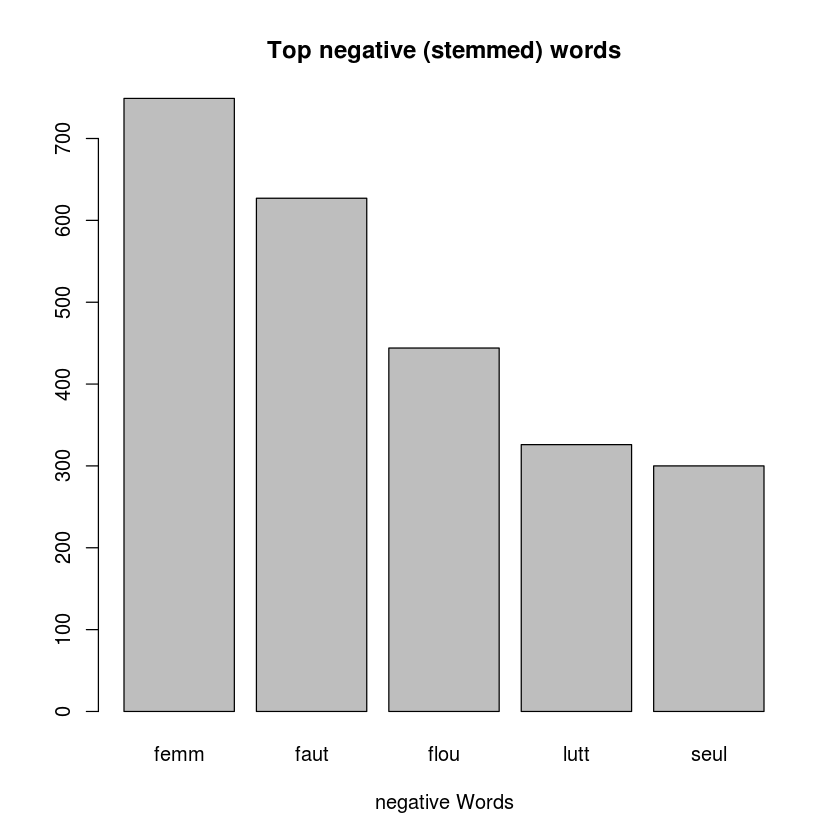

In [37]:
#Plotting our result
words.vector<-unlist(negative_tweets$negative.words)
freq.list<-table(words.vector)
sorted.freq.list<-sort(freq.list, decreasing=TRUE)
mfw = head(sorted.freq.list, n = 5)

# Simple Bar Plot 
barplot(mfw, main="Top negative (stemmed) words", 
  	xlab="negative Words")

<font color="#2E1698" size = 3.2>So, we can see here stemmed words with the highest appearence frequency in negative tweets. We have:
    <ol>
      <li>'femm', the word with the highest frequency which is not even a real word but regroup words with roots like:
        <ol>
          <li>femmes</li>
          <li>femme</li>
        </ol></li>
      <li>'faut', with stemming it regroups also words of the same root, like: 
        <ol>
          <li>faut</li>
          <li>faute</li>
          <li>fautes</li>
        </ol>
      </li>
      <li>'flou', that can regroup:
        <ol>
          <li>flou</li>
          <li>flous</li>
          <li>And maybe mispelled words like 'floux'</li>
        </ol>
      </li>
      <li>'lutt' that may regroup:
        <ol>
            <li>lutte</li>
            <li>luttes</li>
            <li>lutter, etc.</li>
        </ol>
      </li>
      <li>'seul'</li>
    </ol>
</font>